In [13]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

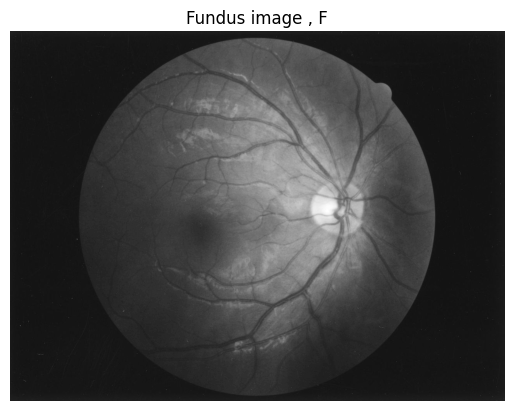

In [14]:
img = cv2.imread("data/fundus.jpg", cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap="gray")
plt.title("Fundus image , F")
plt.axis("off")
plt.savefig("data/fundus_grayscale.png")
plt.show()

In [15]:
img.shape

(957, 1280)

In [16]:
# Create a disk-shaped structuring element
def create_disk(radius):
    se = np.zeros((2*radius+1, 2*radius+1), dtype=np.uint8)
    for i in range(2*radius+1):
        for j in range(2*radius+1):
            if (i - radius)**2 + (j - radius)**2 <= radius**2:
                se[i, j] = 1
    return se

se = create_disk(5)


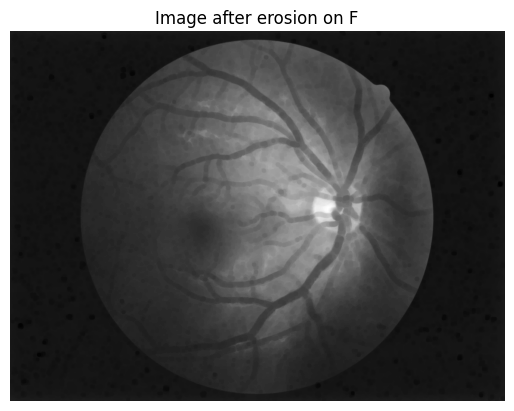

In [17]:
# Custom Erosion Function
def custom_erosion(image, se):
    pad_x, pad_y = se.shape[0] // 2, se.shape[1] // 2
    padded_image = np.pad(image, ((pad_x, pad_x), (pad_y, pad_y)), mode='constant', constant_values=255)
    eroded_image = np.zeros_like(image)
    
    for i in range(pad_x, padded_image.shape[0] - pad_x):
        for j in range(pad_y, padded_image.shape[1] - pad_y):
            region = padded_image[i-pad_x:i+pad_x+1, j-pad_y:j+pad_y+1]
            eroded_image[i-pad_x, j-pad_y] = np.min(region[se == 1])
    
    return eroded_image

# Applying custom erosion
eroded_image = custom_erosion(img, se)
plt.imshow(eroded_image, cmap='gray')
plt.axis('off')

plt.title("Image after erosion on F")
plt.show()


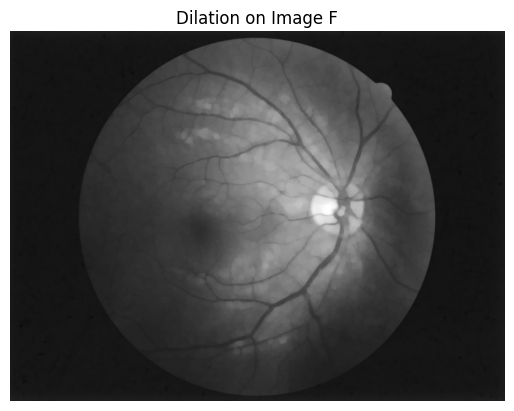

In [18]:
# Custom Dilation Function
def custom_dilation(image, se):
    pad_x, pad_y = se.shape[0] // 2, se.shape[1] // 2
    padded_image = np.pad(image, ((pad_x, pad_x), (pad_y, pad_y)), mode='constant', constant_values=0)
    dilated_image = np.zeros_like(image)
    
    for i in range(pad_x, padded_image.shape[0] - pad_x):
        for j in range(pad_y, padded_image.shape[1] - pad_y):
            region = padded_image[i-pad_x:i+pad_x+1, j-pad_y:j+pad_y+1]
            dilated_image[i-pad_x, j-pad_y] = np.max(region[se == 1])
    
    return dilated_image

# Apply custom dilation
dilated_image = custom_dilation(eroded_image, se)
plt.imshow(dilated_image, cmap='gray')
plt.title("Dilation on Image F")
plt.axis('off')
plt.show()


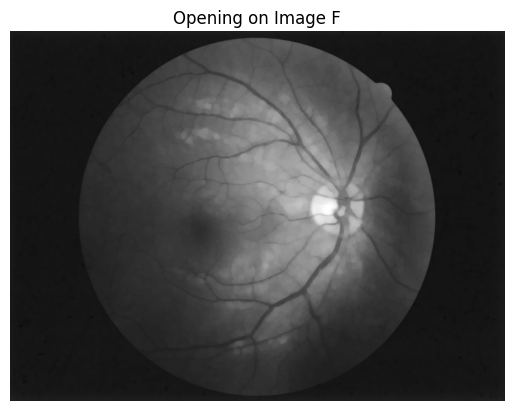

In [19]:
# Custom Opening Function
def custom_opening(image, se):
    eroded_image = custom_erosion(image, se)
    opened_image = custom_dilation(eroded_image, se)
    return opened_image

# Apply custom opening
opened_image = custom_opening(img, se)
plt.imshow(opened_image, cmap='gray')
plt.title("Opening on Image F")
plt.axis('off')
plt.show()


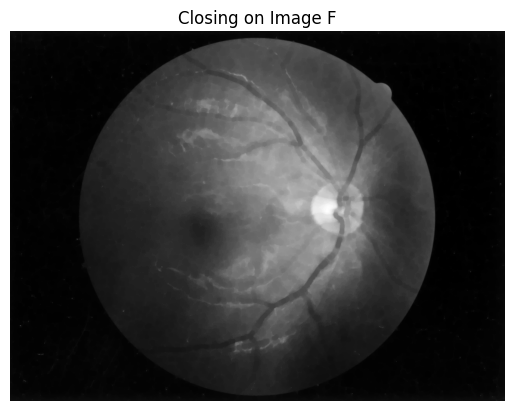

In [20]:
# Custom Closing Function
def custom_closing(image, se):
    dilated_image = custom_dilation(image, se)
    closed_image = custom_erosion(dilated_image, se)
    return closed_image

# Apply custom closing
closed_image = custom_closing(img, se)
plt.imshow(closed_image, cmap='gray')
plt.title("Closing on Image F")
plt.axis('off')

plt.show()


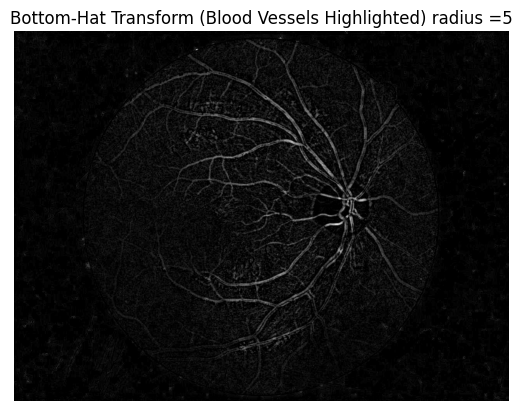

In [21]:
#***************Part b**********************#
# Part (b) - Bottom-Hat Transform to Extract Blood Vessels
def bottom_hat_transform(image, se):
    closed_image = custom_closing(image, se)
    bottom_hat = closed_image - image
    return bottom_hat

# Applying bottom-hat transform
vessels_image = bottom_hat_transform(img, se)
plt.imshow(vessels_image, cmap='gray')
plt.title("Bottom-Hat Transform (Blood Vessels Highlighted) radius =5")
plt.axis('off')

plt.show()


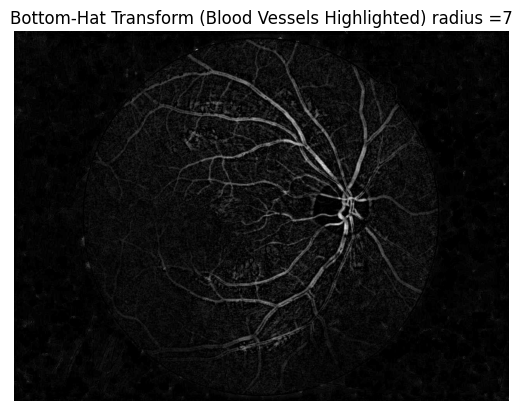

In [ ]:
se7 = create_disk(7)
vessels_image2 = bottom_hat_transform(img, se7)
plt.imshow(vessels_image2, cmap='gray')
plt.title("Bottom-Hat Transform (Blood Vessels Highlighted) radius =7")
plt.axis('off')
plt.show()


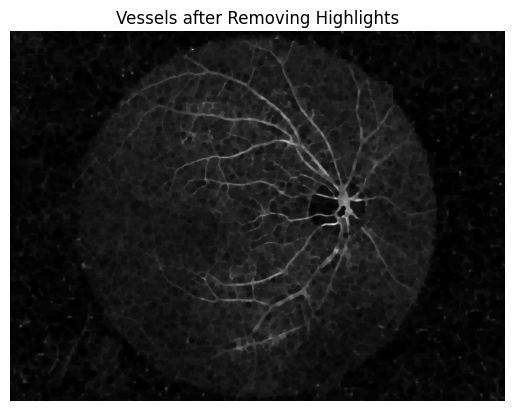

In [ ]:
# Part (c) - Removing Highlight Artifacts
def remove_highlights(vessels_image, se):
    opened = custom_closing(vessels_image, se)
    return opened

# Applying highlight removal
cleaned_vessels_image = remove_highlights(vessels_image2, se7)
plt.imshow(cleaned_vessels_image, cmap='gray')
plt.title("Vessels after Removing Highlights")
plt.axis("off")
plt.show()


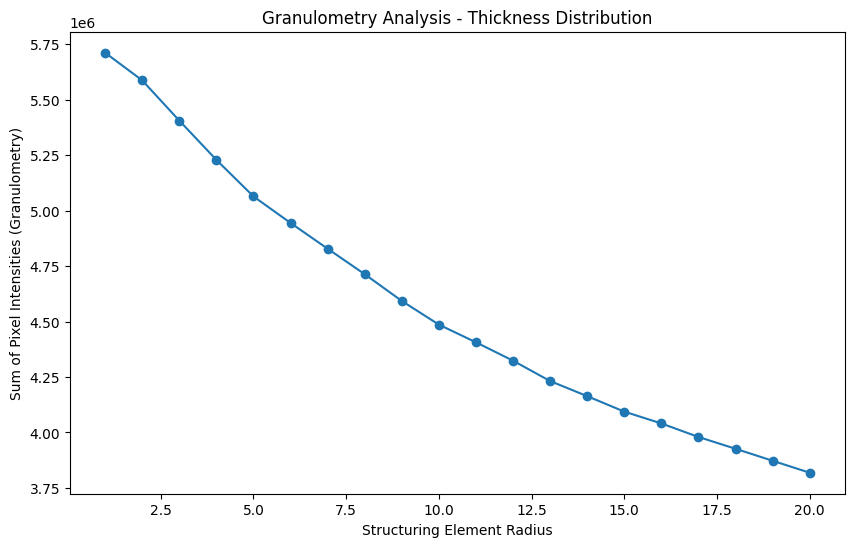

In [24]:
# Part (d) - Granulometry for Thickness Estimation
def granulometry_analysis(vessels_image, max_radius=20):
    sizes = list(range(1, max_radius + 1))
    granulometry_values = []
    
    for r in sizes:
        se = create_disk(r)
        opened_image = custom_opening(vessels_image, se)
        granulometry_values.append(np.sum(opened_image))
    
    # Plot granulometry results
    plt.figure(figsize=(10, 6))
    plt.plot(sizes, granulometry_values, marker='o')
    plt.title("Granulometry Analysis - Thickness Distribution")
    plt.xlabel("Structuring Element Radius")
    plt.ylabel("Sum of Pixel Intensities (Granulometry)")
    plt.show()

# Run granulometry analysis
granulometry_analysis(cleaned_vessels_image)
